In [1]:
import covasim as cv
import numpy as np
# import networkx as nx

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

Covasim 3.1.1 (2021-12-06) — © 2021 by IDM


In [2]:
!pwd

/mnt/d/books/iitm/agentBased/codes/covasim/models/vanilla


In [3]:
pars = dict(
    start_day = '2021-04-01',
    end_day = '2021-04-10',
    
    pop_type = 'matrix', 
    location = 'India-TamilNadu',

    pop_size = 100_000,
    pop_scale = 10,
    rescale = True, 
    pop_infected = 1000, 

    quar_factor = {'h': 0.6, 's': 0, 'w': 0.2, 'c': 0}, # change this factor after certain day
    quar_period = 7,

    home_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/home_contact.csv',
    school_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/school_contact.csv',
    work_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/work_contact.csv',
    community_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/community_contact.csv',
    
    tiles = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/tn_quadkey.csv',
    mobility = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/mobility_matrix.csv',
    pop_density = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/pop_density.csv',
    
    use_waning = False,
    dynam_layer={'c': True},
)

In [13]:
# Intervantions
within_tile_interv = cv.clip_tiles(
    days=[0, 1],
    changes = [0.0, 1.0],
    tile_ids = np.arange(31).tolist(),
    layers = ['s', 'h', 'w']
)

comm_interv = cv.clip_tiles(
    days=[0, 1],
    changes = [0.0, 1.0],
    tile_ids = [0,21,19],
    layers = 'c'
)

In [11]:
# Variant 
delta = cv.variant('b16172', days=0)

Layer name: s


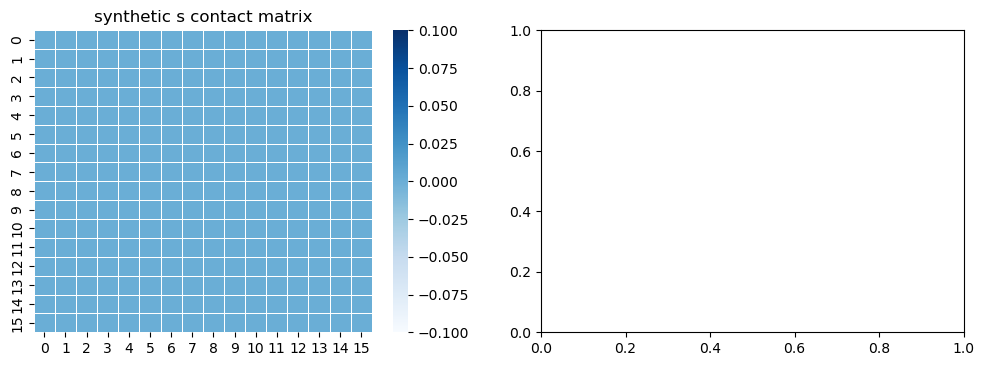

Layer name: h


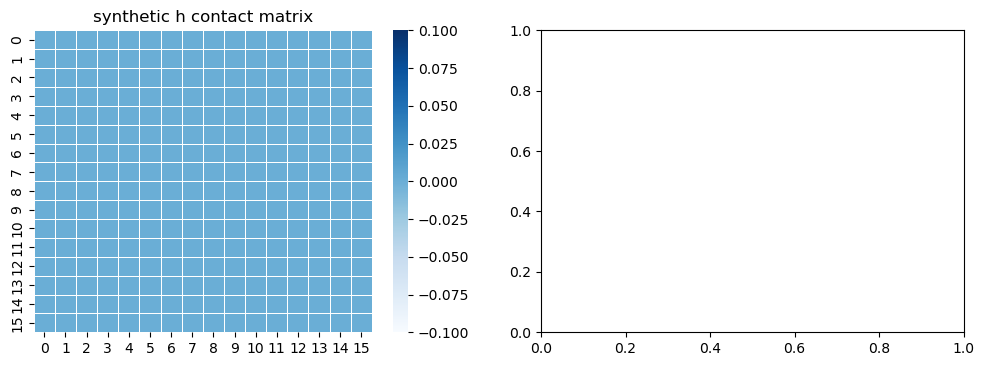

Layer name: w


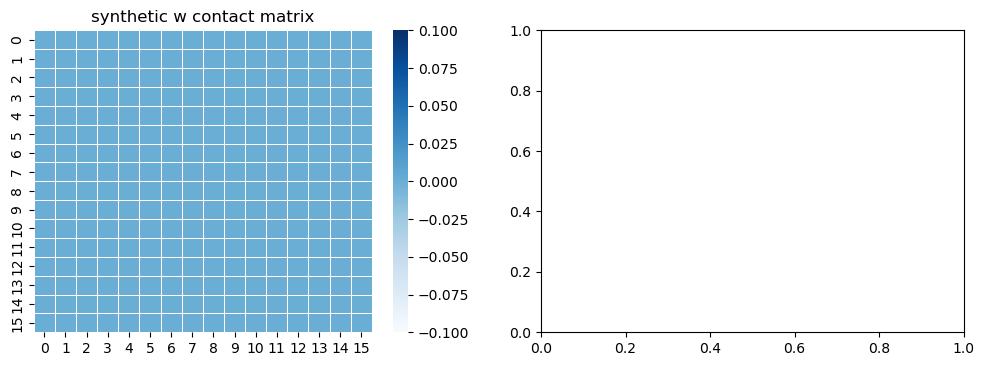

Layer name: s


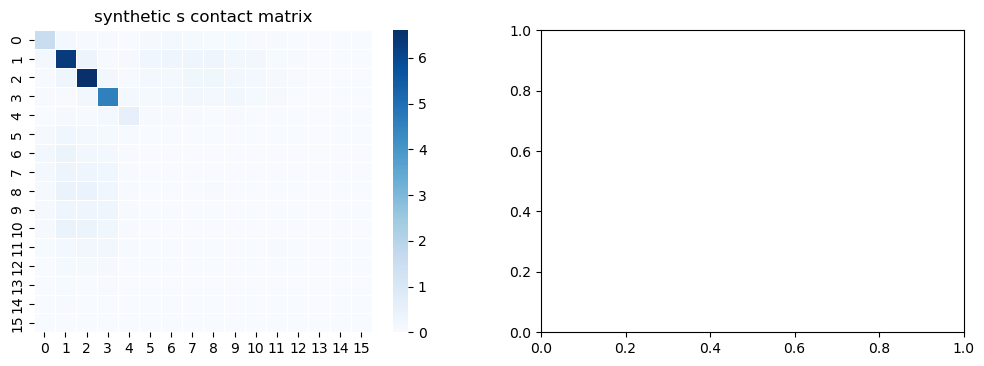

Layer name: h


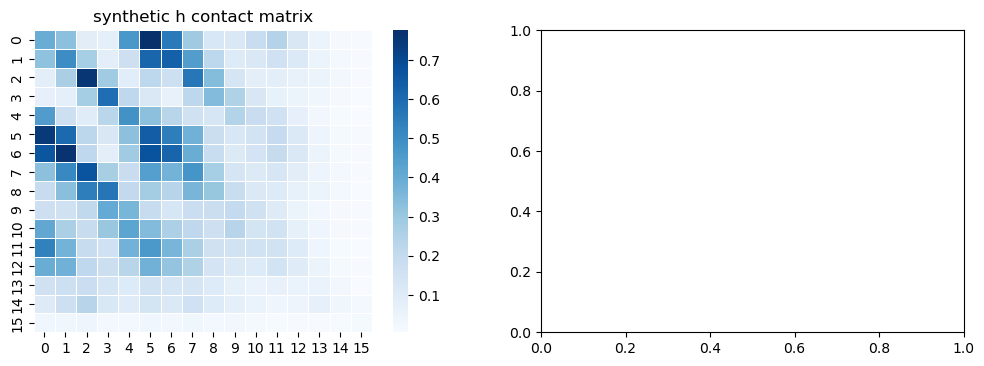

Layer name: w


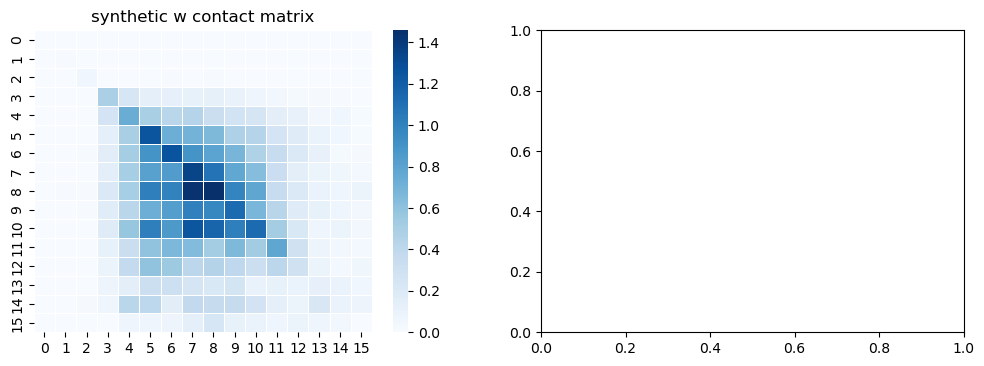

Sim(<no label>; 2021-04-01 to 2021-04-02; pop: 100000 matrix; epi: 11⚙, 0☠)

In [6]:
sim = cv.Sim(interventions=[within_tile_interv], variants=delta, pars=pars)
sim.run()

2021-04-01
Layer name: c


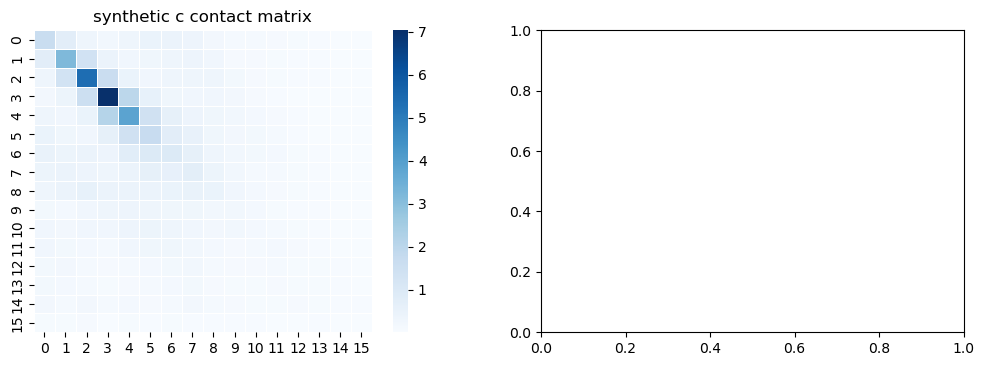

2021-04-02
Layer name: c


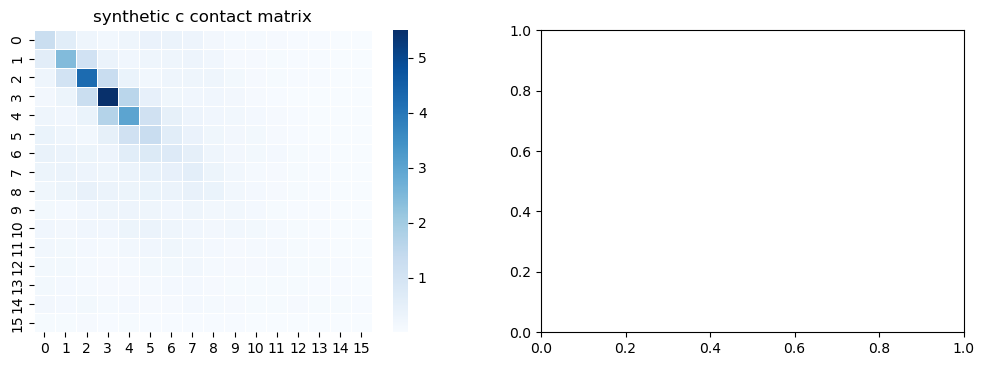

2021-04-03
Layer name: c


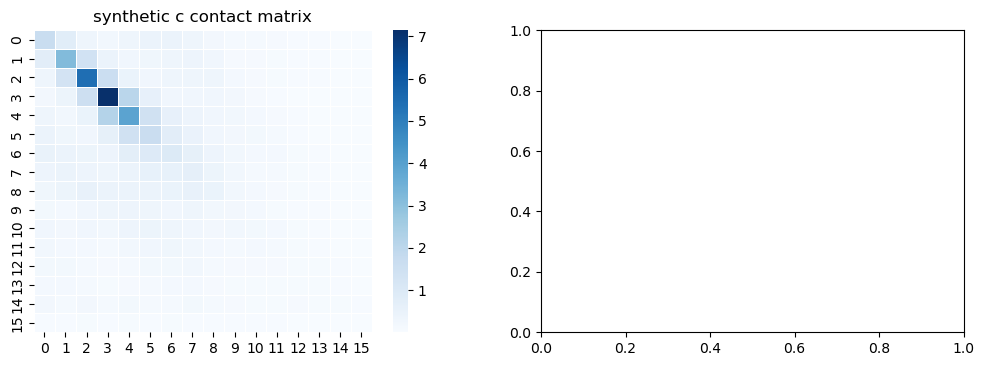

Sim(<no label>; 2021-04-01 to 2021-04-03; pop: 100000 matrix; epi: 11⚙, 0☠)

In [14]:
# Community intervention

sim = cv.Sim(interventions=[comm_interv], variants=delta, pars=pars)
sim.run()

In [ ]:
# msim.mean()
# msim.plot(to_plot=['cum_critical', 'cum_severe', 'cum_infections'])

sim.plot()

In [ ]:
np.arange(13).tolist()